In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Import Tenosrflow
import tensorflow as tf
from tensorflow import keras
import zipfile

2024-04-19 08:27:13.672941: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_mask_dir = os.path.join('./images/train/with_mask')
train_without_mask_dir = os.path.join('./images/train/without_mask')

In [4]:
train_mask = os.listdir(train_mask_dir)
train_without = os.listdir(train_without_mask_dir)

print(f'Total Mask Data: {len(train_mask)}')
print(f'Mask-present Data \n{train_mask[:10]}')
print(f'No mask Data\n{train_without[:10]}')
# Totals for each
print('Size of mask-present images array: ',len(os.listdir(train_mask_dir)))
print('Size of no-mask images array: ',len(os.listdir(train_without_mask_dir)))

Total Mask Data: 306
Mask-present Data 
['with_mask_229.jpg', 'with_mask_201.jpg', 'with_mask_215.jpg', 'with_mask_349.jpg', 'with_mask_413.jpg', 'with_mask_375.jpg', 'with_mask_361.jpg', 'with_mask_407.jpg', 'with_mask_188.jpg', 'with_mask_177.jpg']
No mask Data
['without_mask_536.jpg', 'without_mask_522.jpg', 'without_mask_481.jpg', 'without_mask_495.jpg', 'without_mask_442.jpg', 'without_mask_456.jpg', 'without_mask_457.jpg', 'without_mask_443.jpg', 'without_mask_494.jpg', 'without_mask_480.jpg']
Size of mask-present images array:  306
Size of no-mask images array:  270


In [5]:
import matplotlib.image as mping
%matplotlib inline
nrows = 4
ncols = 4
pic_index = 0

Mask Image




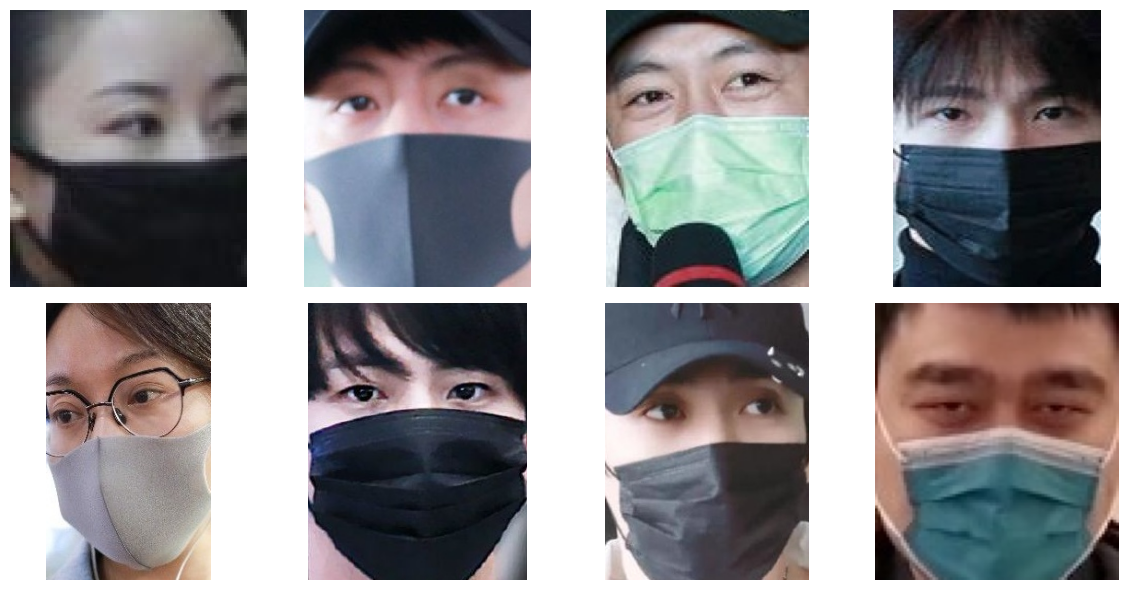

In [6]:
import os
import matplotlib.pyplot as plt

folder_path = "./images/train/with_mask"
files = os.listdir(folder_path)

num_printed = 0

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

print('Mask Image\n\n')

for file in files:
    
    if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
        
        image_path = os.path.join(folder_path, file)
        
        img = plt.imread(image_path)
        row_index = num_printed // 4
        col_index = num_printed % 4
        axs[row_index, col_index].imshow(img)
        axs[row_index, col_index].axis('off')
        
        num_printed += 1
        if num_printed == 8:
            break

# Hide any empty subplots
for i in range(num_printed, 8):
    row_index = i // 4
    col_index = i % 4
    axs[row_index, col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


With Out Mask Image




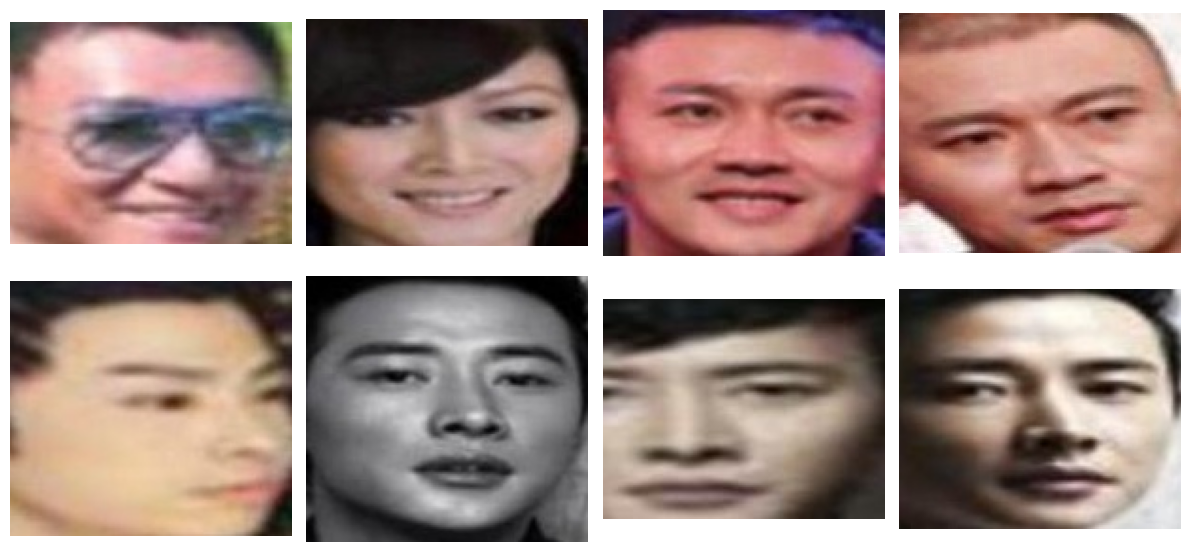

In [7]:
import os
import matplotlib.pyplot as plt

folder_path = "./images/train/without_mask"
files = os.listdir(folder_path)

num_printed = 0

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

print('With Out Mask Image\n\n')

for file in files:
    
    if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
        
        image_path = os.path.join(folder_path, file)
        
        img = plt.imread(image_path)
        row_index = num_printed // 4
        col_index = num_printed % 4
        axs[row_index, col_index].imshow(img)
        axs[row_index, col_index].axis('off')
        
        num_printed += 1
        if num_printed == 8:
            break

# Hide any empty subplots
for i in range(num_printed, 8):
    row_index = i // 4
    col_index = i % 4
    axs[row_index, col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# // 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape= (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1 /255)
train_gernater = train_data.flow_from_directory(
    './images/train',
    target_size=(300,300),
    batch_size=128,
    class_mode = 'binary'
)

Found 576 images belonging to 2 classes.


In [12]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch(self,epoch,logs={}):
        if (logs.get('accuracy' >= 0.80)):
            print('80% accuracy reached')
            self.model.stop_traning = True
callbacks  = myCallBack()            

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_gernater,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6642 - loss: 0.5570
Epoch 2/15


2024-04-19 08:34:11.287201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7280 - loss: 0.5510
Epoch 3/15


2024-04-19 08:34:29.918121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9248 - loss: 0.2379
Epoch 4/15


2024-04-19 08:34:48.843656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9156 - loss: 0.2428
Epoch 5/15


2024-04-19 08:35:07.846705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9163 - loss: 0.2077
Epoch 6/15


2024-04-19 08:35:27.200044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9260 - loss: 0.1969
Epoch 7/15


2024-04-19 08:35:47.811957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9493 - loss: 0.1307
Epoch 8/15


2024-04-19 08:36:06.948758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9534 - loss: 0.1534
Epoch 9/15


2024-04-19 08:36:25.889427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9574 - loss: 0.1095
Epoch 10/15


2024-04-19 08:36:43.770853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9615 - loss: 0.1120
Epoch 11/15


2024-04-19 08:37:03.381298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9683 - loss: 0.1022
Epoch 12/15


2024-04-19 08:37:23.273030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9746 - loss: 0.0741
Epoch 13/15


2024-04-19 08:37:43.363384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9244 - loss: 0.1826
Epoch 14/15


2024-04-19 08:38:03.488987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9478 - loss: 0.1595
Epoch 15/15


2024-04-19 08:38:22.133424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9781 - loss: 0.0829


2024-04-19 08:38:42.224038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [23]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

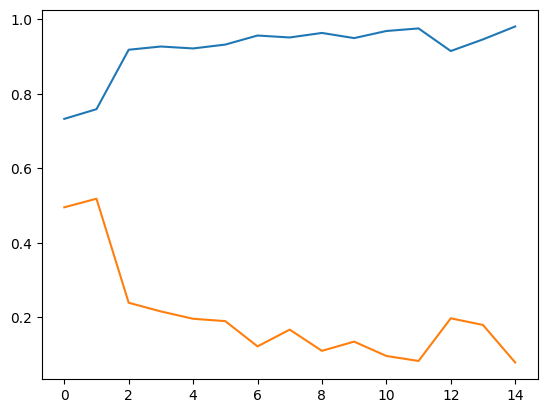

In [24]:
plt.plot(epochs,acc,label='Accuracy')
plt.plot(epochs,loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
without_mask_19.jpg
 Mask Present


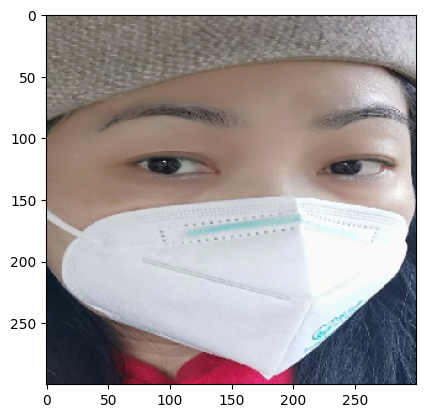

In [35]:
import numpy as np
import os
from keras.preprocessing import image

# testing with our own images
img = image.load_img('./images/test/with_mask/with_mask_25.jpg', target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
# print(img)
plt.imshow(img)

classes = model.predict(images, batch_size=10)
# print(classes[0])
if classes[0] > 0.5:
    print(fn +  '\n No Mask Present')
else:
    print(fn + '\n Mask Present' )

